# Example incremental method

In [1]:
import sympy as sym
import matplotlib.pyplot as plt
sym.init_printing()

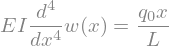

In [2]:
EI, q_0, x, L,M_p = sym.symbols('EI, q_0, x, L, M_p')
w = sym.Function('w')

ODE_bending = sym.Eq(w(x).diff(x, 4) *EI, q_0/L*x)
display(ODE_bending)

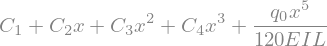

In [3]:
w = sym.dsolve(ODE_bending, w(x)).rhs
display(w)

In [4]:
phi = -w.diff(x)
kappa = phi.diff(x)
M = EI * kappa
V = M.diff(x)

## Fixed beam at both ends

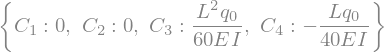

In [5]:
eq1 = sym.Eq(w.subs(x,0),0)
eq2 = sym.Eq(w.subs(x,L),0)
eq3 = sym.Eq(phi.subs(x,0),0)
eq4 = sym.Eq(phi.subs(x,L),0)

sol1 = sym.solve([eq1, eq2, eq3, eq4 ], sym.symbols('C1, C2, C3, C4'))
display(sol1)

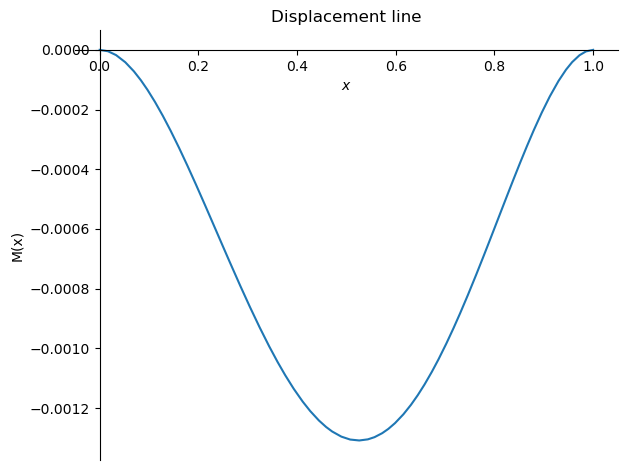

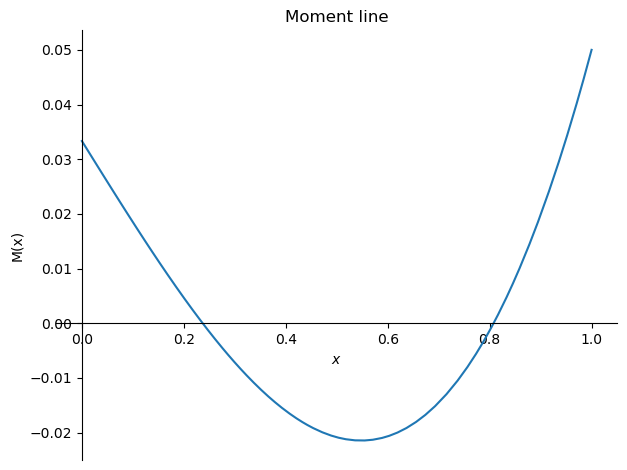

In [6]:
plotvalues = {EI:1, q_0:1, L:1}
sym.plot(-w.subs(sol1).subs(plotvalues),(x,0,1),ylabel='M(x)',title='Displacement line');
sym.plot(-M.subs(sol1).subs(plotvalues),(x,0,1),ylabel='M(x)',title='Moment line');

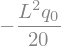

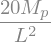

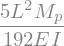

In [7]:
display(M.subs(sol1).subs(x,L))
q1 = sym.solve(sym.Eq(-M.subs(sol1).subs(x,L),M_p), q_0)[0]
display(q1)
w1 = w.subs(sol1).subs(q_0, q1).subs(x,L/2)
display(w1)

## Beam now simply supported on right with $M_p$ working at it

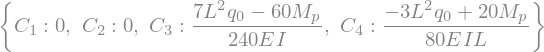

In [8]:
eq1 = sym.Eq(w.subs(x,0),0)
eq2 = sym.Eq(w.subs(x,L),0)
eq3 = sym.Eq(phi.subs(x,0),0)
eq4 = sym.Eq(M.subs(x,L),-M_p)

sol2 = sym.solve([eq1, eq2, eq3, eq4 ], sym.symbols('C1, C2, C3, C4'))
display(sol2)

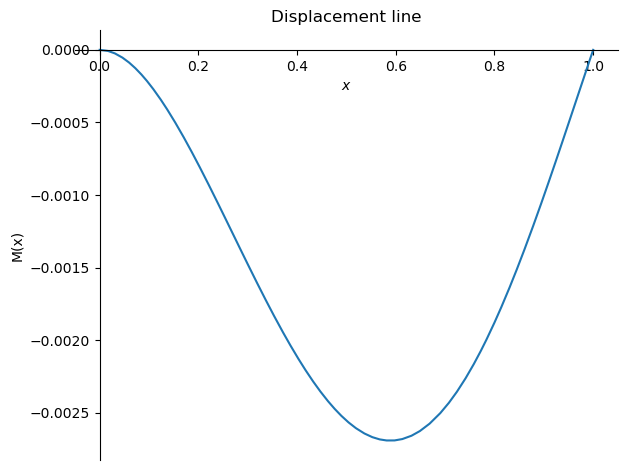

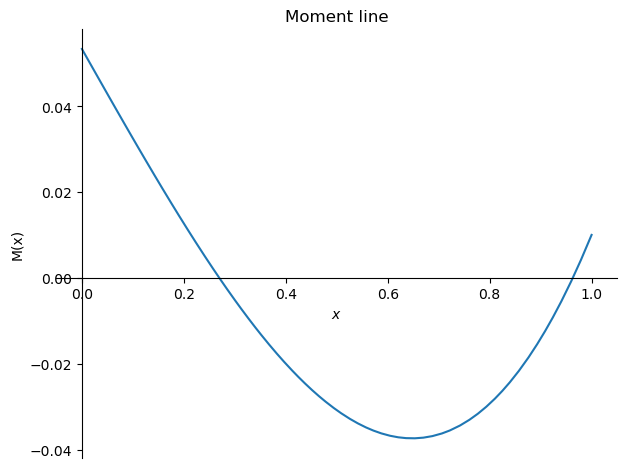

In [9]:
plotvalues = {EI:1, q_0:1, L:1, M_p:0.01}
sym.plot(-w.subs(sol2).subs(plotvalues),(x,0,1),ylabel='M(x)',title='Displacement line');
sym.plot(-M.subs(sol2).subs(plotvalues),(x,0,1),ylabel='M(x)',title='Moment line');

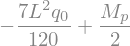

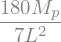

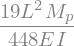

In [10]:
display(M.subs(sol2).subs(x,0))
q2 = sym.solve(sym.Eq(-M.subs(sol2).subs(x,0),M_p), q_0)[0]
display(q2)
w2 = w.subs(sol2).subs(q_0, q2).subs(x,L/2)
display(w2)

# Beam now simply supported on both side with $M_p$ working on it

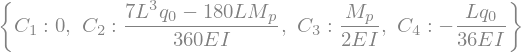

In [11]:
eq1 = sym.Eq(w.subs(x,0),0)
eq2 = sym.Eq(w.subs(x,L),0)
eq3 = sym.Eq(M.subs(x,0),-M_p)
eq4 = sym.Eq(M.subs(x,L),-M_p)

sol3 = sym.solve([eq1, eq2, eq3, eq4 ], sym.symbols('C1, C2, C3, C4'))
display(sol3)

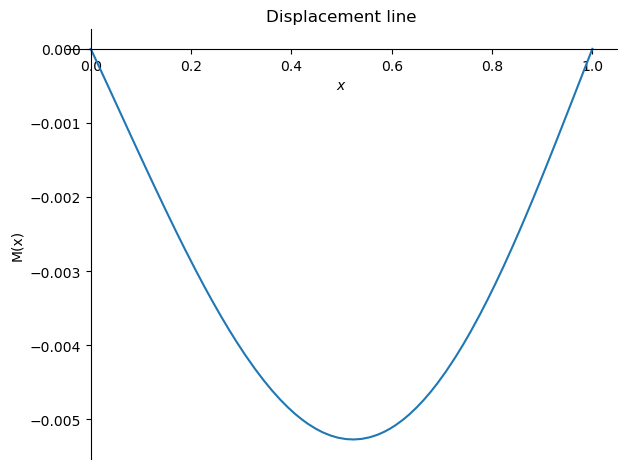

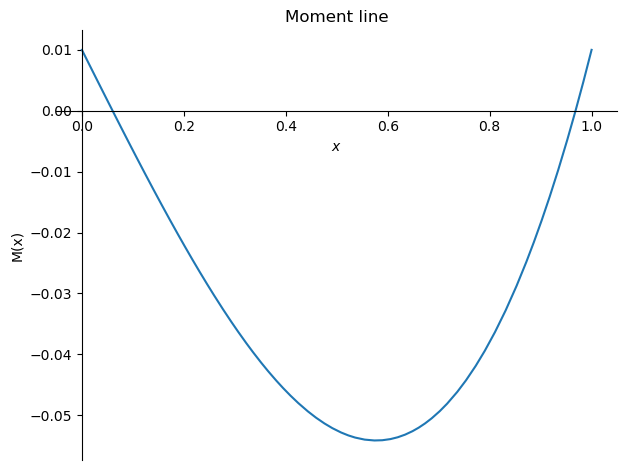

In [12]:
plotvalues = {EI:1, q_0:1, L:1, M_p:0.01}
sym.plot(-w.subs(sol3).subs(plotvalues),(x,0,1),ylabel='M(x)',title='Displacement line');
sym.plot(-M.subs(sol3).subs(plotvalues),(x,0,1),ylabel='M(x)',title='Moment line');

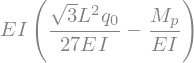

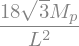

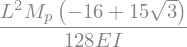

In [17]:
x_M_max = sym.solve(sym.Eq(V.subs(sol3),0),x)[1]
display(M.subs(sol3).subs(x,x_M_max))

q3 = sym.solve(sym.Eq(M.subs(sol3).subs(x,x_M_max).subs(x,0),M_p), q_0)[0]
display(q3)
w3 = w.subs(sol3).subs(q_0, q3).subs(x,L/2).simplify()
display(sym.simplify(w3))

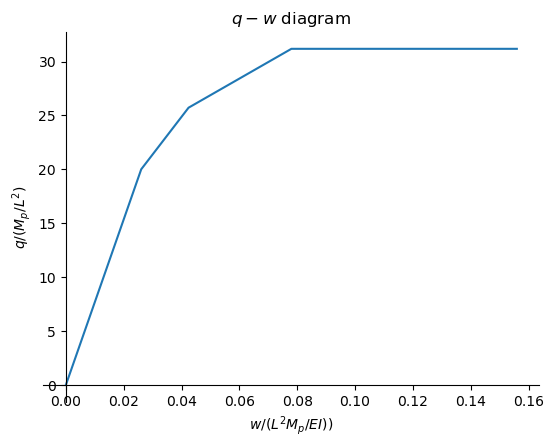

In [21]:
w_list = [0,w1.coeff(L**2*M_p/EI),w2.coeff(L**2*M_p/EI),w3.coeff(L**2*M_p/EI),w3.coeff(L**2*M_p/EI)*2]
q_list = [0,q1.coeff(M_p/L**2),q2.coeff(M_p/L**2),q3.coeff(M_p/L**2),q3.coeff(M_p/L**2)]
plt.plot(w_list,q_list)
plt.xlabel('$w / (L^2 M_p / EI))$')
plt.ylabel('$q / (M_p / L^2)$')
plt.title('$q-w$ diagram')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['left'].set_position('zero')